# CartPole

[링크]https://www.gymlibrary.ml/environments/classic_control/cart_pole/



|Action Space|Discrete(2)|
|--|--|
|Observation Shape|(4,)|
|Observation High|[4.8 inf 0.42 inf]|
|Observation Low|[-4.8 -inf -0.42 -inf]|
|Import|gym.make("CartPole-v1")|

#### Action Space

|num|action|
|--|--|
|0|left|
|1|right|

#### Observation space


|Num|Observation|Min|Max|
|--|--|--|--|
|0|Cart Position|-4.8|4.8|
|1|Cart Velocity|-Inf|Inf|
|2|Pole Angle|~ -0.418 rad (-24°)|~ 0.418 rad (24°)|
|3|Pole Angular Velocity|-Inf|Inf|


#### reward
<span style="color:red">매시간마다 +1 의 리워드를 받는다. 최고 475 v1 기준</span>

In [ ]:
import gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import random
from keras import layers, losses, optimizers, Sequential

In [ ]:
env = gym.make("CartPole-v1")

def get_model(input_size,output_size):
    input_layer = tf.keras.layers.Input(shape=input_size)
    output_layer= tf.keras.layers.Dense(output_size,activation="linear")(input_layer)
    model = tf.keras.Model(input_layer, output_layer)
    model.summary()
    return model

In [3]:
model  = get_model((None,4), 2)
learning_rate,dis, score_list = .1, .99 , []

opti = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

def reshape_state(state):
    return state.reshape(1,4)

for i in range(4000):#4000판을 반복하자
    game_over = False
    state = env.reset()
    epi_score = 0
    e = 1./((i/50)+10)
    while not game_over:
        predict = model(reshape_state(state)).numpy()
        if np.random.rand()<e:
            action = np.argmax(predict,1)[0]
        else:
            action = env.action_space.sample()

        new_state, reward, game_over, _ = env.step(action)
        rewards_future = model(reshape_state(new_state)).numpy()
        epi_score+=reward
        # if game_over:
        #     predict[0,action] = -100
        # else:
        #     predict[0,action] = reward + dis*np.max(rewards_future)
        predict[0,action] = reward + dis*np.max(rewards_future)
        #학습을 시작하지...
        with tf.GradientTape() as tape:
            _pred = model(reshape_state(state))
            _loss = loss(_pred, predict)
        grad = tape.gradient(_loss, model.trainable_weights)
        opti.apply_gradients(zip(grad, model.trainable_weights))
        state = new_state
        epi_score+=reward
    score_list.append(epi_score)
    print(f"epi:{i}, score:{epi_score}")
        



epi:118, score:78.0
epi:119, score:40.0
epi:120, score:28.0
epi:121, score:52.0
epi:122, score:68.0
epi:123, score:28.0
epi:124, score:60.0
epi:125, score:52.0
epi:126, score:40.0
epi:127, score:30.0
epi:128, score:46.0
epi:129, score:32.0
epi:130, score:24.0
epi:131, score:26.0
epi:132, score:56.0
epi:133, score:52.0
epi:134, score:66.0
epi:135, score:34.0
epi:136, score:66.0
epi:137, score:60.0
epi:138, score:22.0
epi:139, score:42.0
epi:140, score:24.0
epi:141, score:52.0
epi:142, score:38.0
epi:143, score:74.0
epi:144, score:28.0
epi:145, score:18.0
epi:146, score:28.0
epi:147, score:102.0
epi:148, score:28.0
epi:149, score:64.0
epi:150, score:48.0
epi:151, score:26.0
epi:152, score:30.0
epi:153, score:110.0
epi:154, score:78.0
epi:155, score:46.0
epi:156, score:74.0
epi:157, score:36.0
epi:158, score:36.0
epi:159, score:32.0
epi:160, score:30.0
epi:161, score:32.0
epi:162, score:62.0
epi:163, score:32.0
epi:164, score:34.0
epi:165, score:68.0
epi:166, score:28.0
epi:167, score:42.

KeyboardInterrupt: 

In [ ]:
# plt.figure(figsize=(30,30))
print(np.average(score_list), np.max(score_list),len(score_list))
plt.plot(score_list)

In [ ]:
#테스트 게임
score_list = []
for i in range(100):
    state = env.reset()
    game_over=False
    score = 0
    while not game_over:
        predict = model(reshape_state(state)).numpy()
        action = np.argmax(predict[0])
        next_state, reward, game_over, _ = env.step(action)
        state = next_state
        score+=reward
    score_list.append(score)
plt.plot(score_list)
print(np.average(score_list), np.min(score_list))

In [4]:
env = gym.make("CartPole-v1")

def get_deep_model(input_size,output_size):
    input_layer = tf.keras.layers.Input(shape=input_size)
    hidden_layer = tf.keras.layers.Dense(16,activation="relu")(input_layer)
    hidden_layer = tf.keras.layers.Dense(8,activation="relu")(hidden_layer)
    output_layer= tf.keras.layers.Dense(output_size,activation="linear")(hidden_layer)
    model = tf.keras.Model(input_layer, output_layer)
    # model.summary()
    return model
# get_deep_model((None,4),2)

def get_keras_model():
    model = Sequential()
    model.add(layers.Dense(16, input_shape=(4,), activation="relu"))
    model.add(layers.Dense(8, activation="relu"))
    model.add(layers.Dense(2, activation="linear"))
    model.compile(
        optimizer=optimizers.adam_v2.Adam(0.01), loss="mse")
    return model

In [5]:
#replay memory 만들기
REPLAY_MEMORY_LIMIT = 5000
replay_buffer = deque(maxlen=REPLAY_MEMORY_LIMIT)

#discount factor
dis = .9
def reshape_state(state):
    return state.reshape(1,4)


In [26]:
loss = tf.keras.losses.MeanSquaredError()
opti = tf.keras.optimizers.Adam(learning_rate=0.01)
lr = .1
def simple_replay_train(minibatch):
    x_stack = np.empty(0).reshape(0,4)
    y_stack = np.empty(0).reshape(0,2)
    for state, action, next_state, reward, game_over in minibatch:
        predict = model(reshape_state(state)).numpy()
        if game_over:
            predict[0,action] = reward
        else:
            future_predict = model(reshape_state(next_state)).numpy()
            predict[0,action] =(1-lr)*predict[0,action] +lr*( reward + dis*np.max(future_predict[0]))
        x_stack = np.vstack([x_stack, state])
        y_stack = np.vstack([y_stack,predict])
    
    with tf.GradientTape() as tape:
        _pred = model(x_stack)
        _loss = loss(y_stack, _pred)
    grad = tape.gradient(_loss, model.trainable_variables)
    opti.apply_gradients(zip(grad, model.trainable_variables))
    # model.fit(x_stack, y_stack, batch_size=64, epochs=1, verbose=0)

# mini = random.sample(replay_buffer,10)
# a,b=simple_replay_train(mini)
# a.shape,b.shape



In [27]:
#모델 1개
# model = get_keras_model()
model = get_deep_model((None, 4),2)
score_list = []
e = 1.0
e_decay = .999
e_min = 0.01
REPLAY_MEMORY_LIMIT = 50000
replay_buffer = deque(maxlen=REPLAY_MEMORY_LIMIT)
for i in range(4000):
    game_over= False
    state = env.reset()
    score = 0
    while not game_over:
        predict = model(reshape_state(state)).numpy()

        if np.random.rand()<e:
            action = env.action_space.sample()
        else:
            action = np.argmax(predict[0])
       
        next_state, reward, game_over, _ = env.step(action)
        score+=reward
        replay_buffer.append((state, action, next_state, reward, game_over))
        state = next_state
        
    score_list.append(score)
    if len(replay_buffer)<64:
        continue
    minibatch = random.sample(replay_buffer,64)
    simple_replay_train(minibatch)
    print(f"epi:{i:4d} score:{score:4.1f} eps:{e:.5f}")
    if e>e_min:
        e *= e_decay
    if np.average( score_list[-10:])>490 and e<.1:
        break

    # if i !=1 and i%50==0:
    #     target.set_weights(model.get_weights())

epi:   2 score:32.0 eps:1.00000
epi:   3 score:10.0 eps:0.99900
epi:   4 score:34.0 eps:0.99800
epi:   5 score:12.0 eps:0.99700
epi:   6 score:14.0 eps:0.99601
epi:   7 score:38.0 eps:0.99501
epi:   8 score:10.0 eps:0.99401
epi:   9 score:33.0 eps:0.99302
epi:  10 score:28.0 eps:0.99203
epi:  11 score:15.0 eps:0.99104
epi:  12 score:28.0 eps:0.99004
epi:  13 score:48.0 eps:0.98905
epi:  14 score:16.0 eps:0.98807
epi:  15 score:40.0 eps:0.98708
epi:  16 score:32.0 eps:0.98609
epi:  17 score:16.0 eps:0.98510
epi:  18 score:16.0 eps:0.98412
epi:  19 score:46.0 eps:0.98314
epi:  20 score:11.0 eps:0.98215
epi:  21 score:43.0 eps:0.98117
epi:  22 score:26.0 eps:0.98019
epi:  23 score:12.0 eps:0.97921
epi:  24 score:11.0 eps:0.97823
epi:  25 score:17.0 eps:0.97725
epi:  26 score:19.0 eps:0.97627
epi:  27 score:10.0 eps:0.97530
epi:  28 score:11.0 eps:0.97432
epi:  29 score:10.0 eps:0.97335
epi:  30 score:10.0 eps:0.97237
epi:  31 score:17.0 eps:0.97140
epi:  32 score:18.0 eps:0.97043
epi:  33

248.82378472222223 500.0


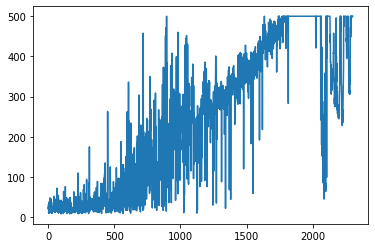

In [28]:
print(np.average(score_list),np.max(score_list))
plt.plot(score_list)


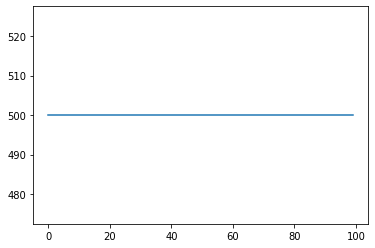

In [29]:
# 테스트
test_score_list = []
for i in range(100):
    score = 0
    game_over = False
    state = env.reset()
    while not game_over:
        predict = model(reshape_state(state)).numpy()
        action = np.argmax(predict[0])

        next_state, reward, game_over, _ = env.step(action)
        score += reward
        state = next_state

    test_score_list.append(score)
plt.plot(test_score_list)
plt.show()

In [30]:
#play
score = 0
game_over = False
state = env.reset()
while not game_over:
    env.render()
    predict = model(reshape_state(state)).numpy()
    action = np.argmax(predict[0])
    next_state, reward, game_over, _ = env.step(action)
    score += reward
    state = next_state
score

500.0

: 

In [22]:
env = gym.make("CartPole-v1")

def get_deep_model(input_size, output_size):
    input_layer = tf.keras.layers.Input(shape=input_size)
    hidden_layer = tf.keras.layers.Dense(16, activation="relu")(input_layer)
    hidden_layer = tf.keras.layers.Dense(8, activation="relu")(hidden_layer)
    output_layer = tf.keras.layers.Dense(
        output_size, activation="linear")(hidden_layer)
    model = tf.keras.Model(input_layer, output_layer)
    # model.summary()
    return model
# get_deep_model((None,4),2)

def get_keras_model():
    model = Sequential()
    model.add(layers.Dense(16, input_shape=(4,), activation="relu"))
    model.add(layers.Dense(8, activation="relu"))
    model.add(layers.Dense(2, activation="linear"))
    model.compile(
        optimizer=optimizers.adam_v2.Adam(0.01), loss="mse")
    return model


# replay memory 만들기
REPLAY_MEMORY_LIMIT = 50000
replay_buffer = deque(maxlen=REPLAY_MEMORY_LIMIT)

# discount factor
dis = .99

def reshape_state(state):
    return state.reshape(1, 4)


loss = tf.keras.losses.MeanSquaredError()
opti = tf.keras.optimizers.Adam(learning_rate=0.01)
# model = get_deep_model((None, 4), 2)
# target = get_deep_model((None, 4), 2)


def simple_replay_train(minibatch):
    x_stack = np.empty(0).reshape(0, 4)
    y_stack = np.empty(0).reshape(0, 2)
    for state, action, next_state, reward, game_over in minibatch:
        predict = model(reshape_state(state)).numpy()
        if game_over:
            predict[0, action] = reward
        else:
            future_predict = target_model(reshape_state(next_state)).numpy()
            predict[0, action] = reward + dis*np.max(future_predict[0])
        x_stack = np.vstack([x_stack, state])
        y_stack = np.vstack([y_stack, predict])
    # model.fit(x_stack, y_stack, verbose=0, batch_size=64)
    with tf.GradientTape() as tape:
        _pred = model(x_stack)
        _loss = loss(y_stack, _pred)
    grad = tape.gradient(_loss, model.trainable_variables)
    opti.apply_gradients(zip(grad, model.trainable_variables))

In [23]:
# mini = random.sample(replay_buffer,10)
# a,b=simple_replay_train(mini)
# a.shape,b.shape
# 모델 1개
REPLAY_MEMORY_LIMIT = 50000
replay_buffer = deque(maxlen=REPLAY_MEMORY_LIMIT)
score_list = []
e = 1.0
e_decay = .999
e_min = 0.01
# model = get_keras_model()
# target_model = get_keras_model()
model = get_deep_model((None, 4), 2)
target_model = get_deep_model((None, 4), 2)
for i in range(4000):
    game_over = False
    state = env.reset()
    score = 0
    while not game_over:
        predict = model(reshape_state(state)).numpy()
        if np.random.rand() < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(predict[0])

        next_state, reward, game_over, _ = env.step(action)
        score += reward

        replay_buffer.append((state, action, next_state, reward, game_over))
        state = next_state

    score_list.append(score)

    print(f"epi:{i:4d} score:{score:3.1f} e:{e:.3f}")
    if len(replay_buffer) < 64:
        continue

    minibatch = random.sample(replay_buffer, 64)
    simple_replay_train(minibatch)
    if i % 10 == 0:
        print("모델복사!!")
        target_model.set_weights(model.get_weights())
    if e > e_min:
        e *= e_decay
    if np.average(score_list[-5:])>490 and e<.15:
        break
print(np.average(score_list), np.max(score_list))
plt.plot(score_list)

epi:   0 score:14.0 e:1.000
epi:   1 score:23.0 e:1.000
epi:   2 score:11.0 e:1.000
epi:   3 score:32.0 e:1.000
epi:   4 score:43.0 e:0.999
epi:   5 score:17.0 e:0.998
epi:   6 score:19.0 e:0.997
epi:   7 score:17.0 e:0.996
epi:   8 score:16.0 e:0.995
epi:   9 score:25.0 e:0.994
epi:  10 score:33.0 e:0.993
모델복사!!
epi:  11 score:16.0 e:0.992
epi:  12 score:35.0 e:0.991
epi:  13 score:16.0 e:0.990
epi:  14 score:36.0 e:0.989
epi:  15 score:23.0 e:0.988
epi:  16 score:20.0 e:0.987
epi:  17 score:28.0 e:0.986
epi:  18 score:20.0 e:0.985
epi:  19 score:13.0 e:0.984


KeyboardInterrupt: 

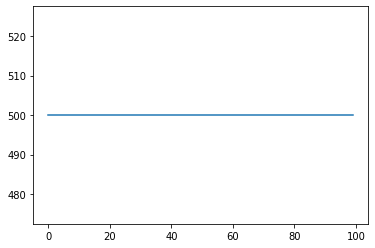

In [20]:
# 테스트
test_score_list = []
for i in range(100):
    score = 0
    game_over = False
    state = env.reset()
    while not game_over:
        predict = model(reshape_state(state)).numpy()
        action = np.argmax(predict[0])

        next_state, reward, game_over, _ = env.step(action)
        score += reward
        state = next_state

    test_score_list.append(score)
plt.plot(test_score_list)
plt.show()

In [ ]:
print(np.average(test_score_list), np.min(test_score_list))
print(np.average(score_list),np.min(score_list))

In [21]:
#play
score = 0
game_over = False
state = env.reset()
while not game_over:
    env.render()
    predict = model(reshape_state(state)).numpy()
    action = np.argmax(predict[0])
    next_state, reward, game_over, _ = env.step(action)
    score += reward
    state = next_state
score

500.0

In [ ]:
state = env.reset()